In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from synth_ts.synth_timeserie_generator import *
import numpy as np

import changefinder
from scipy.signal import argrelextrema

from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

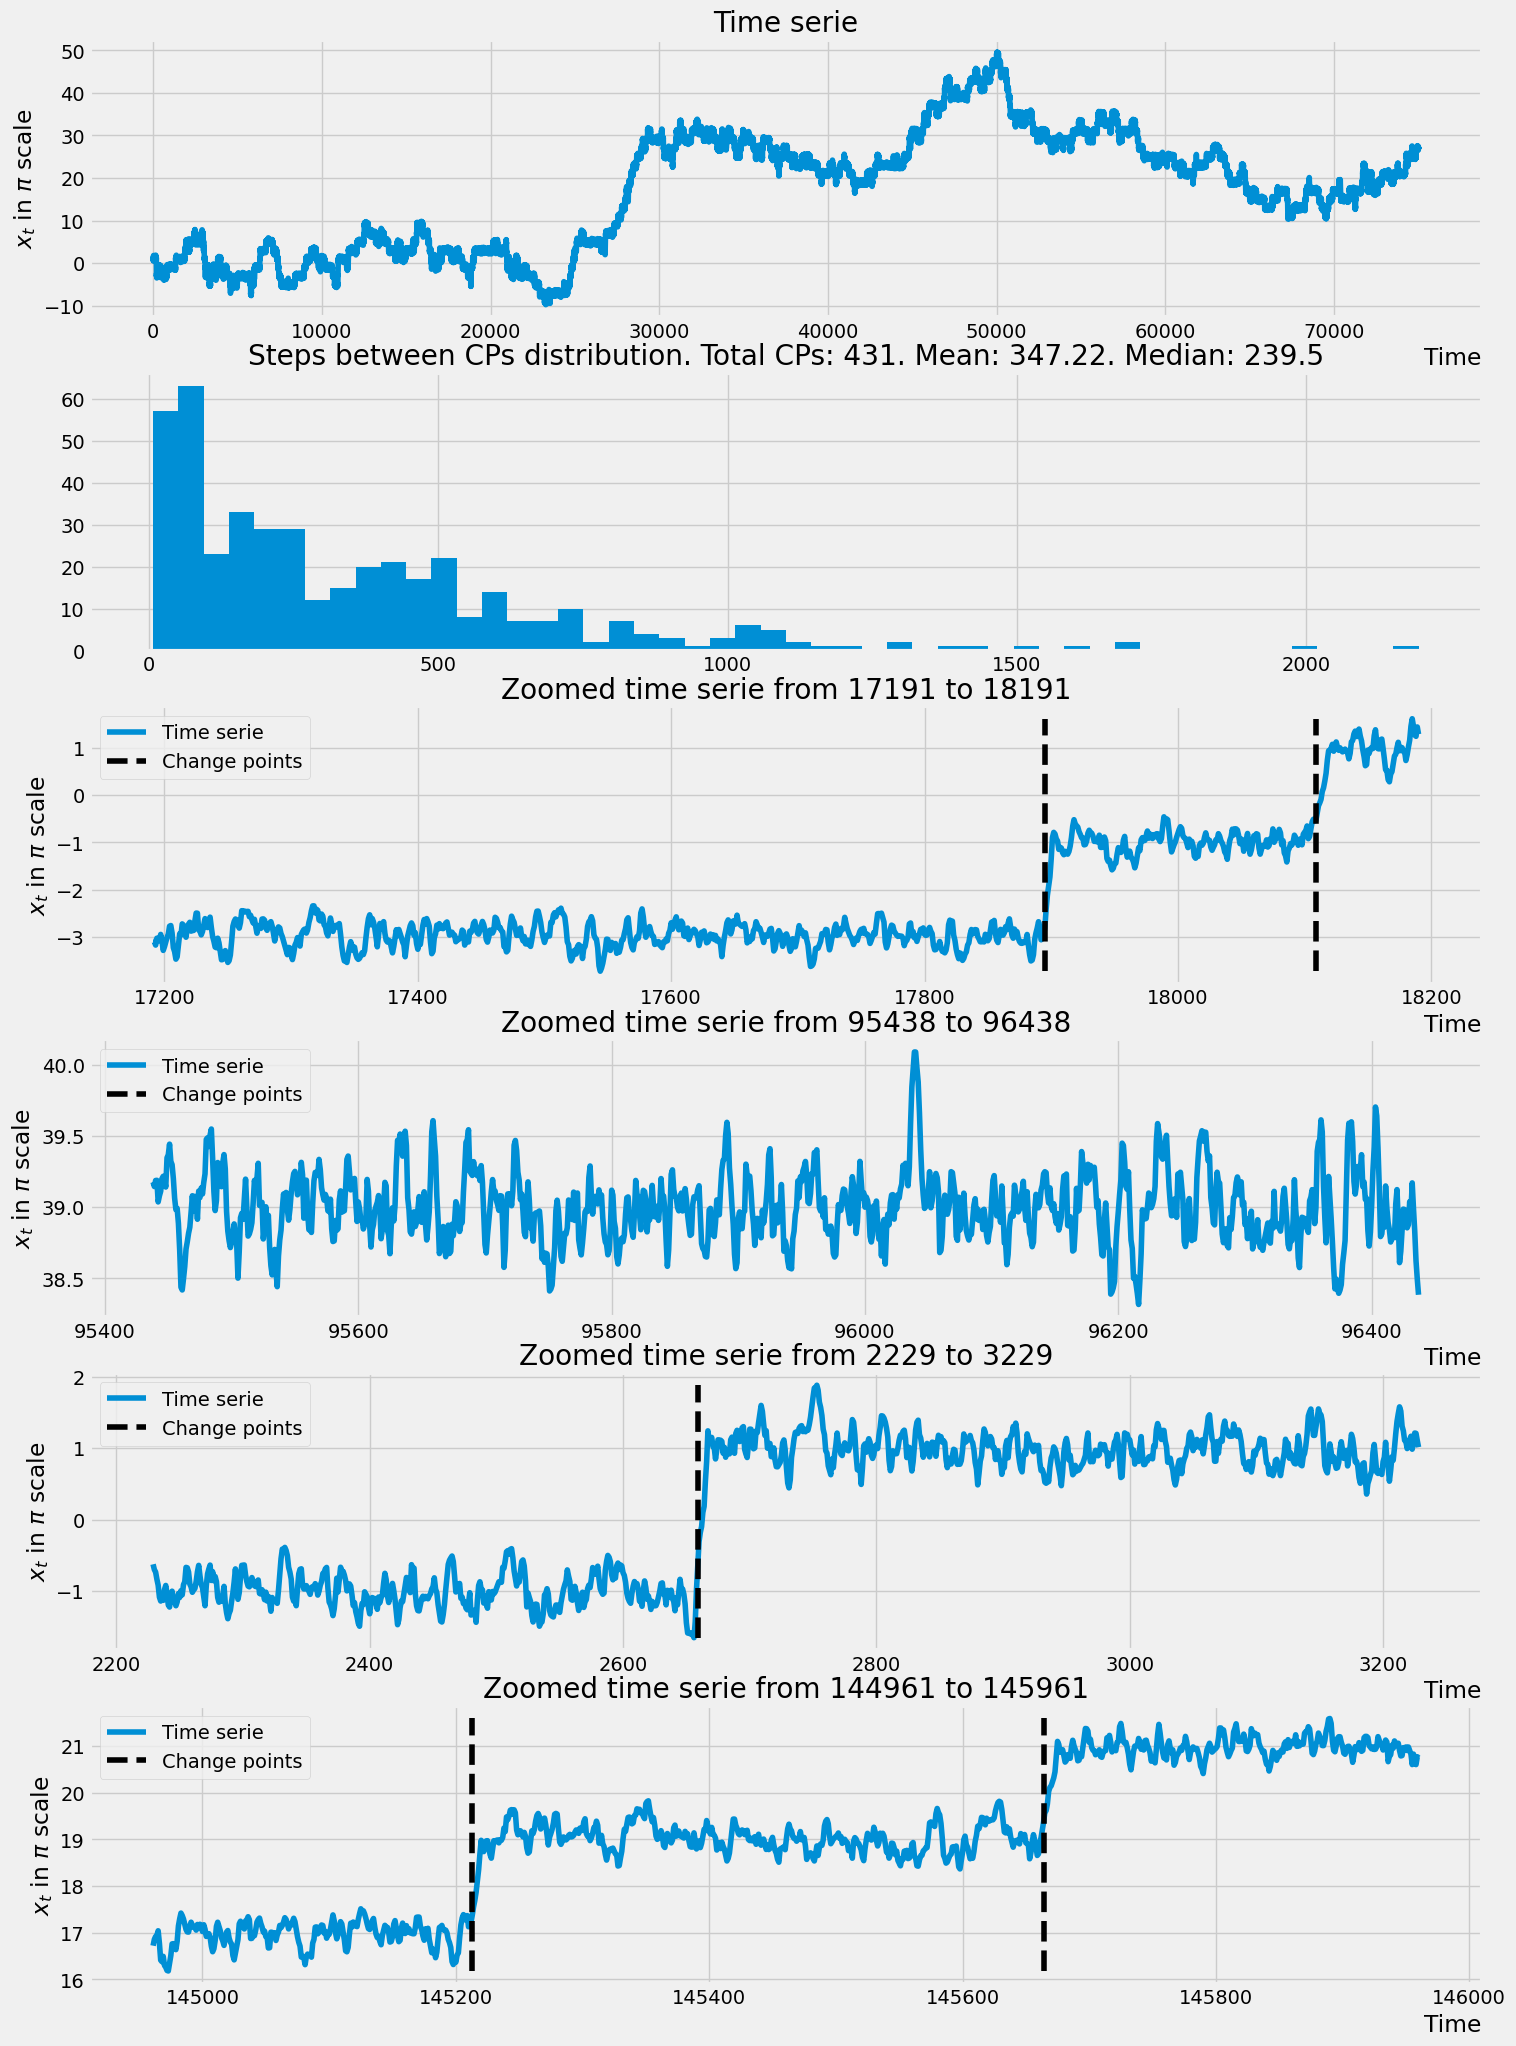

In [3]:
STEP_SIZE = 0.5
MIN_STABILITY_DURATION = 1
ID = '003'
TS_PARAMS = {
    'x0': np.pi,
    'lambd': 1.25,
    'n_steps': 150000,
    'alpha': 0.89,
}
integral_algo = IntegralAlgorithm(**TS_PARAMS)
ts, _ = integral_algo.generate(step_size=STEP_SIZE)
cp_ixs = find_change_points(ts, 1)
ts = demonstrate(TS_PARAMS, STEP_SIZE, ts, cp_ixs, bins=50, subseq_len=1000)

In [9]:
alphas = np.arange(0.5, 4, 0.025)
total_shifts_white = []
means_white = []

for alpha in tqdm(alphas):
    TS_PARAMS = {
        'x0': np.pi,
        'lambd': 1.25,
        'n_steps': 150000,
        'alpha': alpha,
    }
    integral_algo = IntegralAlgorithm(**TS_PARAMS)
    ts, _ = integral_algo.generate(step_size=STEP_SIZE)
    cp_ixs = find_change_points(ts, 1)
    windows = get_windows(cp_ixs, len(ts))
    total_shifts_white.append(len(cp_ixs))
    means_white.append(np.mean(windows))


  0%|          | 0/140 [00:00<?, ?it/s]

In [10]:
alphas = np.arange(0.5, 4, 0.025)
total_shifts_pink = []
means_pink = []

for alpha in tqdm(alphas):
    TS_PARAMS = {
        'x0': np.pi,
        'lambd': 10000,
        'n_steps': 150000,
        'alpha': alpha,
    }
    integral_algo = IntegralAlgorithm(**TS_PARAMS)
    ts, _ = integral_algo.generate(step_size=STEP_SIZE)
    cp_ixs = find_change_points(ts, 1)
    windows = get_windows(cp_ixs, len(ts))
    total_shifts_pink.append(len(cp_ixs))
    means_pink.append(np.mean(windows))

  0%|          | 0/140 [00:00<?, ?it/s]

In [11]:
alphas = np.arange(0.5, 4, 0.025)
total_shifts_red = []
means_red = []

for alpha in tqdm(alphas):
    TS_PARAMS = {
        'x0': np.pi,
        'lambd': 0.1,
        'n_steps': 150000,
        'alpha': alpha,
    }
    integral_algo = IntegralAlgorithm(**TS_PARAMS)
    ts, _ = integral_algo.generate(step_size=STEP_SIZE)
    cp_ixs = find_change_points(ts, 1)
    windows = get_windows(cp_ixs, len(ts))
    total_shifts_red.append(len(cp_ixs))
    means_red.append(np.mean(windows))

  0%|          | 0/140 [00:00<?, ?it/s]

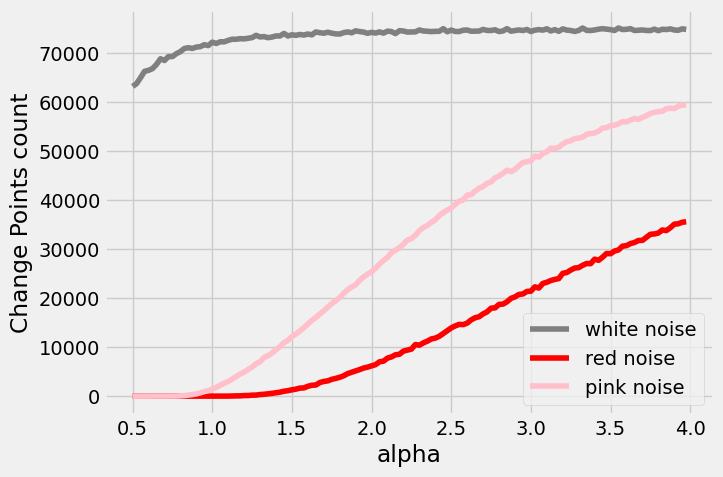

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
ax.plot(alphas, total_shifts_pink, label = 'white noise', color='grey')
ax.plot(alphas, total_shifts_red, label = 'red noise', color = 'red')
ax.plot(alphas, total_shifts_white, label = 'pink noise', color = 'pink')
ax.set_xlabel('alpha')
ax.set_ylabel('Change Points count')
ax.legend()

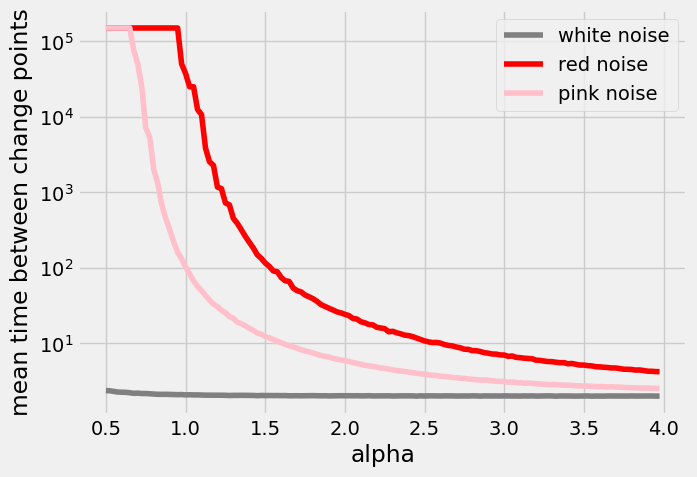

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
ax.semilogy(alphas, means_pink, label = 'white noise', color='grey')
ax.semilogy(alphas, means_red, label = 'red noise', color = 'red')
ax.semilogy(alphas, means_white, label = 'pink noise', color = 'pink')
ax.set_xlabel('alpha')
ax.set_ylabel('mean time between change points')
ax.legend()

white kde:

In [33]:
alphas = np.arange(0.15, 0.25, 0.025)
white = []

for alpha in tqdm(alphas):
    TS_PARAMS = {
        'x0': np.pi,
        'lambd': 10000,
        'n_steps': 150000,
        'alpha': alpha,
    }
    integral_algo = IntegralAlgorithm(**TS_PARAMS)
    ts, _ = integral_algo.generate(step_size=STEP_SIZE)
    cp_ixs = find_change_points(ts, 1)
    windows = get_windows(cp_ixs, len(ts))
    white.append(windows)

  0%|          | 0/4 [00:00<?, ?it/s]

(0.0, 35.0)

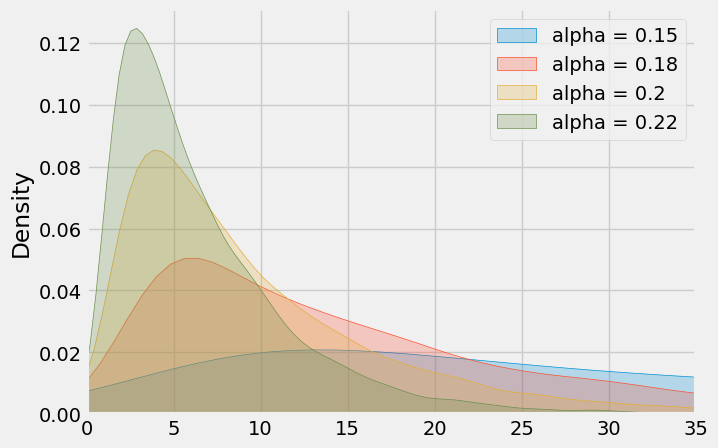

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for i, win in enumerate(white):
    sns.kdeplot(win, fill=True, ax = ax, label = f'alpha = {round(alphas[i], 2)}')
ax.legend()
ax.set_xlim((0, 35))

In [40]:
alphas = np.arange(1.5, 2.5, 0.25)
pinks = []

for alpha in tqdm(alphas):
    TS_PARAMS = {
        'x0': np.pi,
        'lambd': 1.25,
        'n_steps': 150000,
        'alpha': alpha,
    }
    integral_algo = IntegralAlgorithm(**TS_PARAMS)
    ts, _ = integral_algo.generate(step_size=STEP_SIZE)
    cp_ixs = find_change_points(ts, 1)
    windows = get_windows(cp_ixs, len(ts))
    pinks.append(windows)

  0%|          | 0/4 [00:00<?, ?it/s]

(0.0, 50.0)

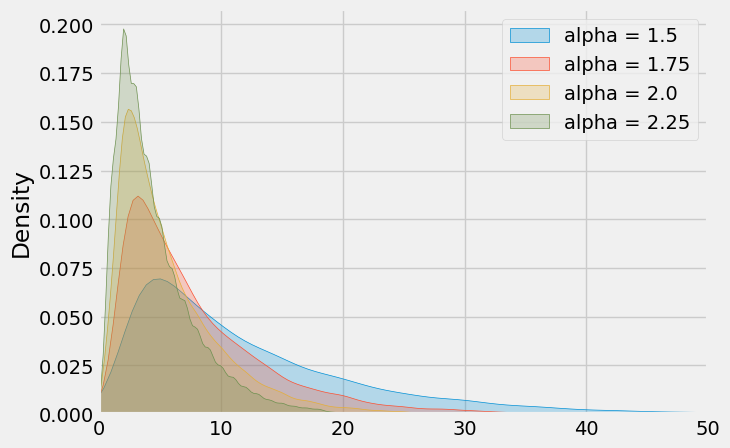

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for i, win in enumerate(pinks):
    sns.kdeplot(win, fill=True, ax = ax, label = f'alpha = {round(alphas[i], 2)}')
ax.legend()
ax.set_xlim((0, 50))

In [44]:
alphas = np.arange(2, 3, 0.25)
reds = []

for alpha in tqdm(alphas):
    TS_PARAMS = {
        'x0': np.pi,
        'lambd': 0.1,
        'n_steps': 150000,
        'alpha': alpha,
    }
    integral_algo = IntegralAlgorithm(**TS_PARAMS)
    ts, _ = integral_algo.generate(step_size=STEP_SIZE)
    cp_ixs = find_change_points(ts, 1)
    windows = get_windows(cp_ixs, len(ts))
    reds.append(windows)

  0%|          | 0/4 [00:00<?, ?it/s]

(0.0, 35.0)

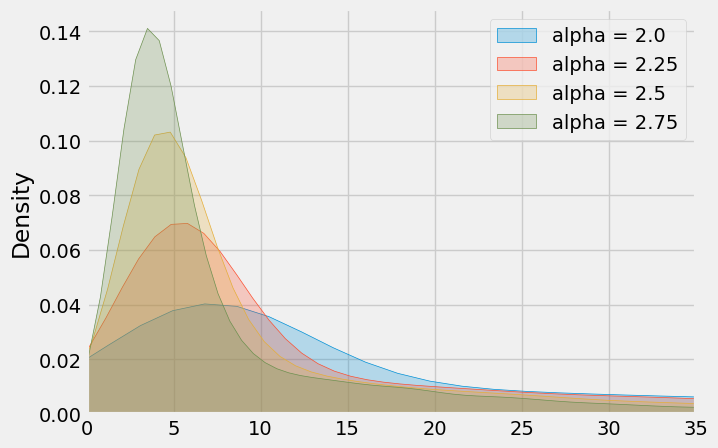

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for i, win in enumerate(reds):
    sns.kdeplot(win, fill=True, ax = ax, label = f'alpha = {round(alphas[i], 2)}')
ax.legend()
ax.set_xlim((0, 35))

(0.0, 25.0)

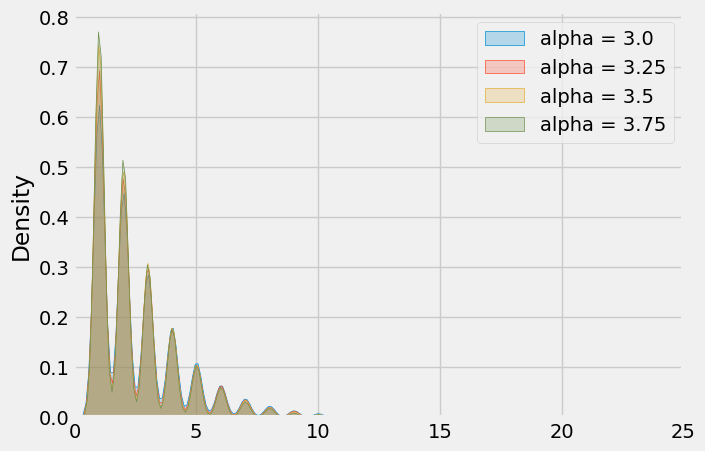

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for i, win in enumerate(white):
    sns.kdeplot(win, fill=True, ax = ax, label = f'alpha = {round(alphas[i], 2)}')
ax.legend()
ax.set_xlim((0, 25))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for i, win in enumerate(pinks):
    sns.kdeplot(win, fill=True, ax = ax, label = f'alpha = {round(alphas[i], 2)}')
ax.legend()
ax.set_xlim((0, 25))